In [448]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardataset/data.csv


In [449]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [450]:
df_old = pd.read_csv("/kaggle/input/cardataset/data.csv")
df_old.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [451]:
features = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [452]:
df = df_old.loc[:,features]

In [453]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.rename(columns={"msrp": "price"})
df = df.fillna(0)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [454]:
categorical = ['make','model','transmission_type','vehicle_style']
numerical = ['year', 'engine_hp','engine_cylinders','highway_mpg','city_mpg']

In [455]:
above_average = (df.price >= df.price.mean())
above_average = above_average.astype(int)
df['above_average'] = above_average
del df['price']
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [456]:
from sklearn.model_selection import train_test_split

In [457]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [458]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [459]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [460]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [461]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [462]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [463]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [464]:
from sklearn.metrics import auc

In [465]:
X_train

array([[2.700e+01, 6.000e+00, 2.800e+02, ..., 0.000e+00, 0.000e+00,
        2.016e+03],
       [1.800e+01, 6.000e+00, 3.000e+02, ..., 1.000e+00, 0.000e+00,
        2.014e+03],
       [1.900e+01, 4.000e+00, 2.590e+02, ..., 1.000e+00, 0.000e+00,
        2.016e+03],
       ...,
       [3.200e+01, 4.000e+00, 1.300e+02, ..., 0.000e+00, 0.000e+00,
        2.017e+03],
       [1.600e+01, 5.000e+00, 1.620e+02, ..., 1.000e+00, 0.000e+00,
        1.991e+03],
       [1.400e+01, 6.000e+00, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03]])

In [466]:
from sklearn.metrics import roc_auc_score

In [467]:
df_train['year']

0       2016
1       2014
2       2016
3       2015
4       2016
        ... 
7143    2015
7144    2016
7145    2017
7146    1991
7147    2003
Name: year, Length: 7148, dtype: int64

In [468]:
for feature in numerical:
    area = roc_auc_score(y_train, df_train[feature] , max_fpr = None)
    print(f"feature: {feature},  auc = {area}")

feature: year,  auc = 0.687551492804683
feature: engine_hp,  auc = 0.9171031265539011
feature: engine_cylinders,  auc = 0.766116490165669
feature: highway_mpg,  auc = 0.3669412128227987
feature: city_mpg,  auc = 0.3265755356754767


In [469]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [470]:
y_pred = model.predict_proba(X_val)[:, 1]

In [471]:
roc_auc_score(y_val, y_pred)

0.9797482414575607

In [472]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [473]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['Precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['Recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

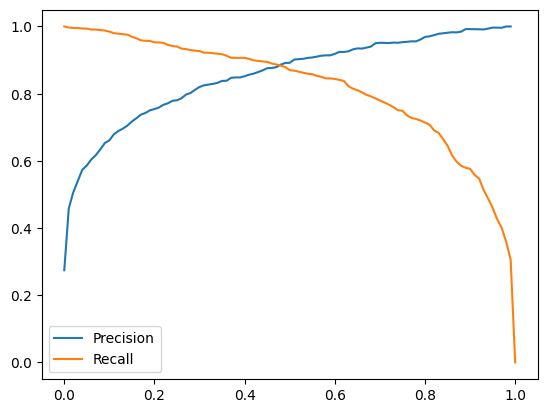

In [474]:
plt.plot(df_scores.threshold, df_scores['Precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['Recall'], label='Recall')
plt.legend()

In [475]:
df_scores['F'] = 2 * (df_scores.Precision * df_scores.Recall / (df_scores.Recall + df_scores.Precision))
#df['F'].idxmax()
df_scores.iloc[df_scores['F'].idxmax()]

threshold       0.490000
tp            575.000000
fp             70.000000
fn             79.000000
tn           1659.000000
Precision       0.891473
Recall          0.879205
F               0.885296
Name: 49, dtype: float64

In [476]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [477]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [478]:
from sklearn.model_selection import KFold

In [479]:
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.4f +- %.4f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.9351 +- 0.0030
C=0.01 0.9516 +- 0.0025
C=0.1 0.9718 +- 0.0016
C=0.5 0.9769 +- 0.0016
C=1 0.9793 +- 0.0021
C=5 0.9810 +- 0.0031
C=10 0.9813 +- 0.0033
